In [175]:
from datetime import date
from logging.config import valid_ident
from multiprocessing.sharedctypes import Value
from optparse import Values
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

movies = pd.read_csv("./MoviesOnStreamingPlatforms.csv")

###############################################################

subset1 = movies[['Rotten Tomatoes']]

subset2 = movies[['Netflix']]
print(subset1.head())
print(subset2.head())
# print( movies.info() )
print("===================================================")

print(subset2["Netflix"].value_counts() )

print("===================================================")

 # 있나 없나 구분하기 1로 데이터 가공하기
 # 평점점수 분류 및 평점에따른 인수 합계

Netflix =  subset2.groupby("Netflix").agg(sum_Netflix=('Netflix', 'sum'))
Netflix.to_csv("Netflix.csv", encoding="cp949")


  Rotten Tomatoes
0          98/100
1          97/100
2          95/100
3          94/100
4          94/100
   Netflix
0        1
1        1
2        1
3        1
4        1
0    5820
1    3695
Name: Netflix, dtype: int64


In [176]:
sub1 = movies.loc[movies["Netflix"] == 1]
sub2 = sub1["Rotten Tomatoes"].value_counts()
sub2

46/100    122
50/100    120
48/100    114
56/100    113
55/100    110
         ... 
24/100      1
27/100      1
28/100      1
93/100      1
98/100      1
Name: Rotten Tomatoes, Length: 82, dtype: int64

In [177]:
def cutscore(score):

    if type(score) == str:
    
        return score[:len(score)-4]
    else:
        return score
print()
sub1 = movies[movies["Netflix"] == 1]
sub1.head(20)
print(cutscore(sub1.loc[0, "Rotten Tomatoes"]))

sub1["new"] = sub1["Rotten Tomatoes"].apply(cutscore)
sub1.head(20)


98


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13756\388082183.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1["new"] = sub1["Rotten Tomatoes"].apply(cutscore)


,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,new
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0,98
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0,97
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0,95
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0,94
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0,94
5,5,6,To All the Boys I've Loved Before,2018,13+,94/100,1,0,0,0,0,94
6,6,7,The Social Dilemma,2020,13+,93/100,1,0,0,0,0,93
7,7,8,Okja,2017,13+,92/100,1,0,0,0,0,92
8,8,9,The Ballad of Buster Scruggs,2018,16+,92/100,1,0,0,0,0,92
9,9,10,The Trial of the Chicago 7,2020,18+,92/100,1,0,0,0,0,92


In [178]:
sub1["new"].isna().sum()
sub2 = sub1.dropna(subset=["new"])
sub2["new"].isna().sum()
sub2.info()
sub2["new"].value_counts()

sub2["new"]=sub2["new"].astype(float)
sub2.info()
print("==================================================================================================")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688 entries, 0 to 3687
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3688 non-null   int64 
 1   ID               3688 non-null   int64 
 2   Title            3688 non-null   object
 3   Year             3688 non-null   int64 
 4   Age              1898 non-null   object
 5   Rotten Tomatoes  3688 non-null   object
 6   Netflix          3688 non-null   int64 
 7   Hulu             3688 non-null   int64 
 8   Prime Video      3688 non-null   int64 
 9   Disney+          3688 non-null   int64 
 10  Type             3688 non-null   int64 
 11  new              3688 non-null   object
dtypes: int64(8), object(4)
memory usage: 374.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688 entries, 0 to 3687
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13756\4168014979.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub2["new"]=sub2["new"].astype(float)


10      53
20      12
30     373
40     991
50    1031
60     674
70     386
80     147
90      21
Name: sub, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13756\3639564582.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub2["sub"] = sub2["new"].apply(get_grade)


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

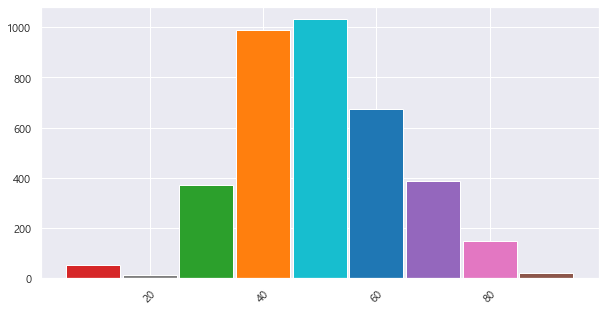

In [186]:
# 한글 폰트 설정 전에 스타일을 지정해야한다.
sns.set(color_codes=True)
sns.set_style('darkgrid')

###### 차트에 환경설정 : 한글 폰트 지정하기
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

def get_grade(score):
    if(score>=90):
        return 90
    elif score>=80:
        return 80
    elif score>=70:
        return 70
    elif score>=60:
        return 60
    
    elif score>=50:
        return 50
    
    elif score>=40:
        return 40
    
    elif score>=30:
        return 30
    
    elif score>=20:
        return 20

    elif score>=10:
        return 10
    else:
        return 0
        
sub2["sub"] = sub2["new"].apply(get_grade)
sub2.head()
a = sub2["sub"].value_counts().sort_index()

print( (a)) 

x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

bar_labels = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
bar_colors = ['tab:red', 'tab:gray', 'tab:green', 'tab:orange', 'tab:cyan','tab:blue', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:cyan']

fig, ax = plt.subplots()
ax.bar(a.index, a, width=9.5, label=bar_labels, color=bar_colors)
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
plt.xticks(rotation=45)


<AxesSubplot:ylabel='Frequency'>

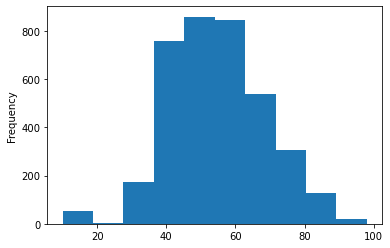

In [77]:
sub2["new"].plot.hist()

sub1 = movies[movies["Netflix"] == 1]
sub1.head(20)
sub2 = sub1.iloc["Rotten Tomatoes"] #.value_counts()
sub2
sub2.head()
 stk.query("Date.str.startswith(@month) & Date.str.endswith(@year)")
 sub2.plot.hist(bins=10)
 sub2.value_counts().plot()